$$ ITI \space AI-Pro: \space Intake \space 45 $$
$$ Deep \space Learning $$
$$ Image \space Classification $$

# `01` Deep NN
- Design your own `deep NN` to classify the `CIFAR 10` images (you can download from keras.dataset) into one of the 10 classes
- Investigate the use of different architectures (`different layers`, `learning rate`, `optimizers`, `loss function`)
- Note you will need to `flatten` the image and use it as your input vector

## `+` Import Libraries

In [32]:
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

from keras import Input
from keras.layers import Dense, Flatten, Dropout, BatchNormalization, Conv2D, Activation, MaxPooling2D, AveragePooling2D
from keras.models import Sequential

from keras.applications.resnet_v2 import ResNet50V2

## `+` Load & Preprocess CIFAR 10 Dataset

In [3]:
(X_train, y_train), (X_test, y_test) = keras.datasets.cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 5s 0us/step


In [3]:
print(f"Shape of X_train: {X_train.shape}")
print(f"Shape of y_train: {y_train.shape}")
print(f"Shape of X_test: {X_test.shape}")
print(f"Shape of y_test: {y_test.shape}")

Shape of X_train: (50000, 32, 32, 3)
Shape of y_train: (50000, 1)
Shape of X_test: (10000, 32, 32, 3)
Shape of y_test: (10000, 1)


### Preview the Images

In [4]:
# add new column for map encoded target two labels ex. 6-> frog

class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

# Create a new column with the class names
y_train_with_names = [class_names[label[0]] for label in y_train]
y_test_with_names = [class_names[label[0]] for label in y_test]

# Print some examples
for i in range(5):
  print(f"Label: {y_train[i][0]}, Class name: {y_train_with_names[i]}")

Label: 6, Class name: frog
Label: 9, Class name: truck
Label: 9, Class name: truck
Label: 4, Class name: deer
Label: 1, Class name: automobile


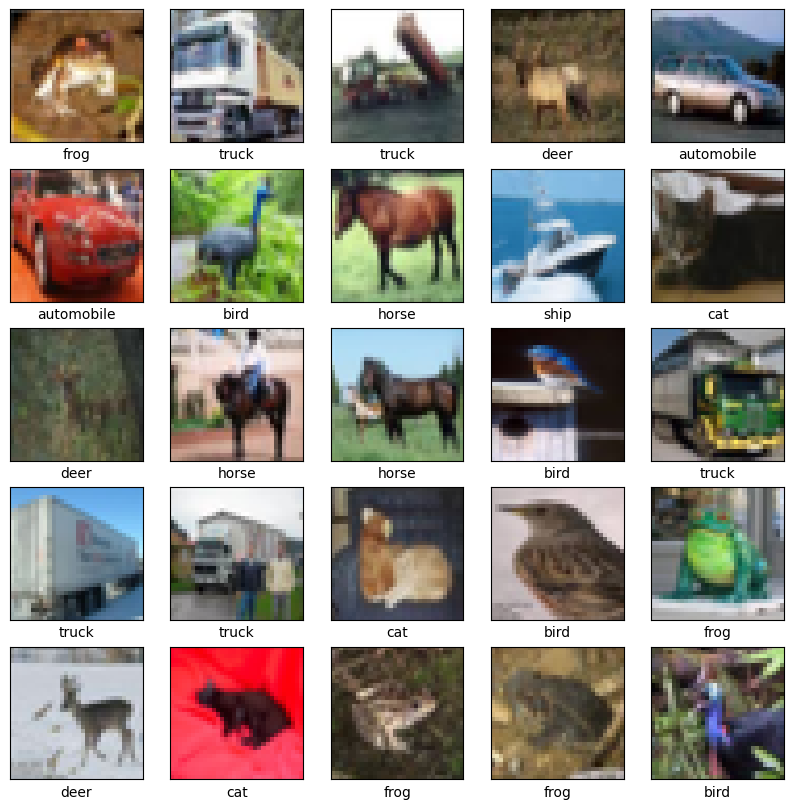

In [ ]:
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_train[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[y_train[i][0]])
plt.show()

### Feature Rescaling

In [4]:
# Rescale Input
X_train = X_train / 255.
X_test  = X_test / 255.

### OneHotEncode Target Variable

In [5]:
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

## `+` Set Global Parameters

In [6]:
# Hyperparameters
EPOCHS = 100
BATCH_SIZE = 64
SEED = 123

## `i` Trial no. 1

### Model Training

In [8]:
model1 = Sequential()

model1.add(Input(shape=X_train.shape[1:]))
model1.add(Flatten())

model1.add(Dense(64))
model1.add(BatchNormalization())
model1.add(Activation('relu'))

model1.add(Dense(32, activation='relu'))
model1.add(Dropout(0.2))

model1.add(Dense(10, activation='softmax'))

model1.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten (Flatten)                    │ (None, 3072)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │         196,672 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 64)                  │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation (Activation)              │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 10)                  │             330 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 199,338 (778.66 KB)

 Trainable params: 199,210 (778.16 KB)

 Non-trainable params: 128 (512.00 B)

In [9]:
model1.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [12]:
history_model1= model1.fit(X_train, y_train, epochs=EPOCHS, batch_size=BATCH_SIZE, validation_split=0.15)

Epoch 1/100
665/665 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.6636 - loss: 0.9285 - val_accuracy: 0.4545 - val_loss: 1.8688
Epoch 2/100
665/665 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.6805 - loss: 0.8836 - val_accuracy: 0.4097 - val_loss: 2.4267
Epoch 3/100
665/665 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.6723 - loss: 0.9081 - val_accuracy: 0.4212 - val_loss: 2.3746
Epoch 4/100
665/665 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.6800 - loss: 0.8667 - val_accuracy: 0.4293 - val_loss: 2.0496
Epoch 5/100
665/665 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.6828 - loss: 0.8724 - val_accuracy: 0.4327 - val_loss: 1.9436
Epoch 6/100
665/665 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.6881 - loss: 0.8591 - val_accuracy: 0.4040 - val_loss: 2.3888
Epoch 7/100
665/665 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.6839 - loss: 0.8745 - val_accuracy: 0.4521 - val_loss: 1.8891
Epoch 8/100
665/665 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.6812 - loss: 0.8750 - val_accu

### Model Evaluation

In [13]:
loss_train, accuracy_train = model1.evaluate(X_train, y_train)
print(f"Accuracy for training: {accuracy_train:.4%}")

loss_test, accuracy_test = model1.evaluate(X_test, y_test)
print(f"Accuracy for testing: {accuracy_test:.4%}")

1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.6731 - loss: 0.9084
Accuracy for training: 63.9440%
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.4281 - loss: 2.1662
Accuracy for testing: 42.3500%


### Result Visualization

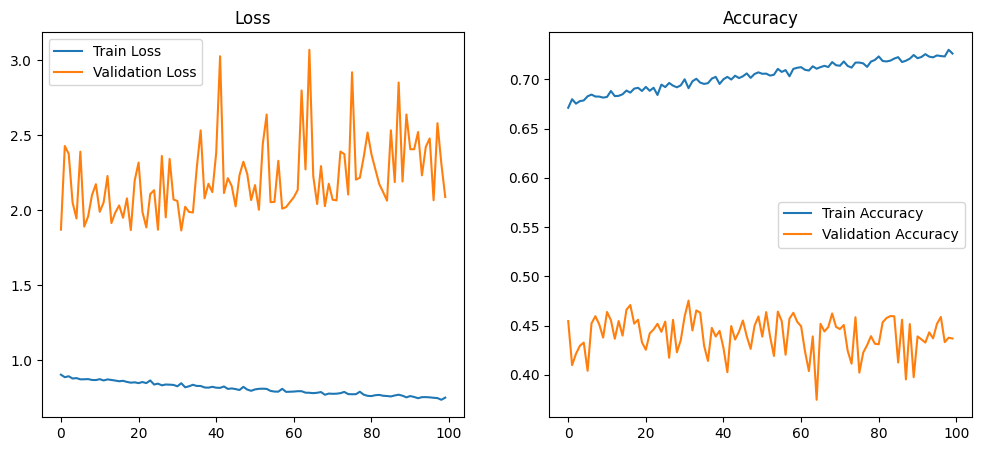

In [14]:
# Plot the training and validation accuracy and loss
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history_model1.history['loss'], label='Train Loss')
plt.plot(history_model1.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Loss')

plt.subplot(1, 2, 2)
plt.plot(history_model1.history['accuracy'], label='Train Accuracy')
plt.plot(history_model1.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Accuracy')

plt.show()

- `There is an overfit ,so let's try adding more dropout.`

## `ii` Trial no. 2

### Model Training

In [15]:
model2 = Sequential()

model2.add(Flatten(input_shape=(32, 32, 3)))

model2.add(Dense(512, activation='relu'))
model2.add(BatchNormalization())
model2.add(Dropout(0.3))

model2.add(Dense(256, activation='relu'))
model2.add(BatchNormalization())
model2.add(Dropout(0.3))

model2.add(Dense(128, activation='relu'))
model2.add(Dropout(0.2))

model2.add(Dense(10, activation='softmax'))

model2.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_1 (Flatten)                  │ (None, 3072)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 512)                 │       1,573,376 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 512)                 │           2,048 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 256)                 │         131,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 256)                 │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,741,962 (6.65 MB)

 Trainable params: 1,740,426 (6.64 MB)

 Non-trainable params: 1,536 (6.00 KB)

In [16]:
model2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [17]:
history_model2= model2.fit(X_train, y_train, epochs=EPOCHS, batch_size=BATCH_SIZE, validation_split=0.15)

Epoch 1/100
665/665 ━━━━━━━━━━━━━━━━━━━━ 11s 9ms/step - accuracy: 0.2714 - loss: 2.1395 - val_accuracy: 0.3456 - val_loss: 1.8306
Epoch 2/100
665/665 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.3701 - loss: 1.7510 - val_accuracy: 0.3091 - val_loss: 1.8532
Epoch 3/100
665/665 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.3970 - loss: 1.6861 - val_accuracy: 0.4136 - val_loss: 1.6309
Epoch 4/100
665/665 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.4168 - loss: 1.6345 - val_accuracy: 0.3968 - val_loss: 1.7031
Epoch 5/100
665/665 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.4236 - loss: 1.6238 - val_accuracy: 0.3959 - val_loss: 1.6808
Epoch 6/100
665/665 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.4174 - loss: 1.6255 - val_accuracy: 0.4332 - val_loss: 1.5600
Epoch 7/100
665/665 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.4224 - loss: 1.6093 - val_accuracy: 0.4160 - val_loss: 1.6093
Epoch 8/100
665/665 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.4283 - loss: 1.6078 - val_acc

### Model Evaluation

In [18]:
loss_train, accuracy_train = model2.evaluate(X_train, y_train)
print(f"Accuracy for training: {accuracy_train:.4%}")

loss_test, accuracy_test = model2.evaluate(X_test, y_test)
print(f"Accuracy for testing: {accuracy_test:.4%}")

1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.5743 - loss: 1.2039
Accuracy for training: 56.2460%
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5064 - loss: 1.3812
Accuracy for testing: 50.0400%


### Result Visualization

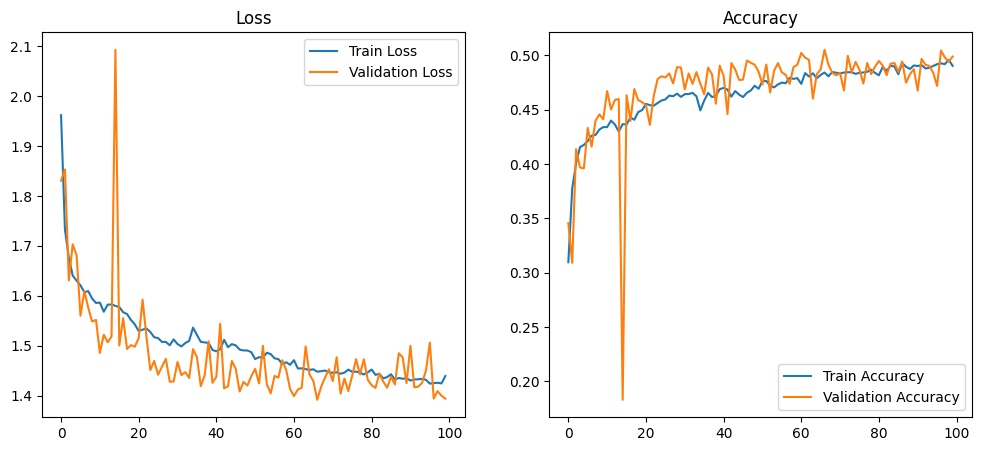

In [19]:
# Plot the training and validation accuracy and loss
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history_model2.history['loss'], label='Train Loss')
plt.plot(history_model2.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Loss')

plt.subplot(1, 2, 2)
plt.plot(history_model2.history['accuracy'], label='Train Accuracy')
plt.plot(history_model2.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Accuracy')

plt.show()


- `Now we overcome the overfitting 🎉`

**Note:** Add more trials and explore different hyperparameters and design decisions.

------------------------------

# `02` Transfer Learning
- Design your `deep convolutional neural network` to classify the `CIFAR 10` images into one of the 10 classes
- Use a pre-trained model to boost your network.
- Invistage the use of different architectures (different `layers`, `kernel sizes`, `pooling`, `learning rate`, `optimizers`, `loss function`)

You have to specify filters and kernel_size. These parameters have no default.

Default padding is valid, which means no zero-padding, and the default strides is (1,1).

$\frac{N - F + 2P}{S} + 1$

$P = \frac{F - 1}{2}$

## `i` Trial no. 1

### Model Training

In [7]:
pre_trained = ResNet50V2(include_top=False, pooling='avg', weights='imagenet')
for layer in pre_trained.layers:
  layer.trainable = False

94668760/94668760 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [8]:
transfer_model = Sequential()
transfer_model.add(Input(shape=X_train.shape[1:]))
transfer_model.add(pre_trained)
transfer_model.add(Dense(10, activation='softmax'))

transfer_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ resnet50v2 (Functional)              │ (None, 2048)                │      23,564,800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 10)                  │          20,490 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 23,585,290 (89.97 MB)

 Trainable params: 20,490 (80.04 KB)

 Non-trainable params: 23,564,800 (89.89 MB)

In [9]:
transfer_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [10]:
transfer_history = transfer_model.fit(X_train, y_train, epochs=EPOCHS, batch_size=BATCH_SIZE, validation_split=0.15)

Epoch 1/100
665/665 ━━━━━━━━━━━━━━━━━━━━ 27s 24ms/step - accuracy: 0.2576 - loss: 2.1168 - val_accuracy: 0.3485 - val_loss: 1.9132
Epoch 2/100
665/665 ━━━━━━━━━━━━━━━━━━━━ 27s 11ms/step - accuracy: 0.3688 - loss: 1.8697 - val_accuracy: 0.3649 - val_loss: 1.8512
Epoch 3/100
665/665 ━━━━━━━━━━━━━━━━━━━━ 10s 10ms/step - accuracy: 0.3882 - loss: 1.7970 - val_accuracy: 0.3753 - val_loss: 1.8245
Epoch 4/100
665/665 ━━━━━━━━━━━━━━━━━━━━ 9s 9ms/step - accuracy: 0.4020 - loss: 1.7527 - val_accuracy: 0.3820 - val_loss: 1.8081
Epoch 5/100
665/665 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - accuracy: 0.4094 - loss: 1.7271 - val_accuracy: 0.3840 - val_loss: 1.8024
Epoch 6/100
665/665 ━━━━━━━━━━━━━━━━━━━━ 10s 10ms/step - accuracy: 0.4170 - loss: 1.7058 - val_accuracy: 0.3872 - val_loss: 1.7958
Epoch 7/100
665/665 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - accuracy: 0.4168 - loss: 1.6925 - val_accuracy: 0.3855 - val_loss: 1.7916
Epoch 8/100
665/665 ━━━━━━━━━━━━━━━━━━━━ 11s 10ms/step - accuracy: 0.4242 - loss: 1.6762 

### Model Evaluation

In [11]:
loss_train, accuracy_train = transfer_model.evaluate(X_train, y_train)
print(f"Accuracy for training: {accuracy_train:.4%}")

loss_test, accuracy_test = transfer_model.evaluate(X_test, y_test)
print(f"Accuracy for testing: {accuracy_test:.4%}")

1563/1563 ━━━━━━━━━━━━━━━━━━━━ 15s 8ms/step - accuracy: 0.4691 - loss: 1.5215
Accuracy for training: 45.7660%
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.3981 - loss: 1.9748
Accuracy for testing: 38.7500%


### Result Visualization

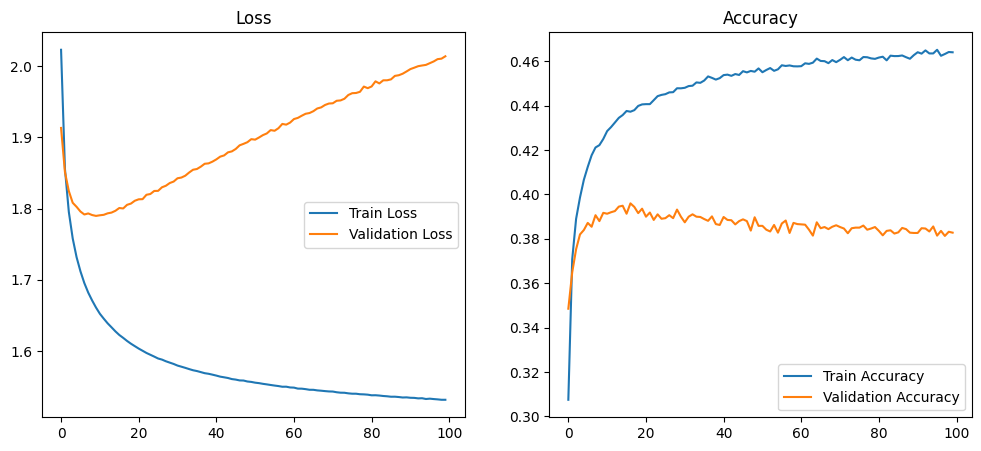

In [12]:
# Plot the training and validation accuracy and loss
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(transfer_history.history['loss'], label='Train Loss')
plt.plot(transfer_history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Loss')

plt.subplot(1, 2, 2)
plt.plot(transfer_history.history['accuracy'], label='Train Accuracy')
plt.plot(transfer_history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Accuracy')

plt.show()



## `ii` Trial no. 2

### Model Training

In [24]:
transfer_model2 = Sequential()

transfer_model2.add(pre_trained)
transfer_model2.add(Flatten())

transfer_model2.add(Dense(256, activation='relu'))
transfer_model2.add(BatchNormalization())
transfer_model2.add(Dropout(0.3))

transfer_model2.add(Dense(128, activation='relu'))
transfer_model2.add(Dropout(0.2))

transfer_model2.add(Dense(10, activation='softmax'))

transfer_model2.summary()


Model: "sequential_11"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ resnet50v2 (Functional)              │ (None, 2048)                │      23,564,800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_4 (Flatten)                  │ (None, 2048)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 256)                 │         524,544 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 256)                 │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 24,124,554 (92.03 MB)

 Trainable params: 559,242 (2.13 MB)

 Non-trainable params: 23,565,312 (89.89 MB)

In [25]:
transfer_model2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [27]:
transfer_history2 = transfer_model2.fit(X_train, y_train, epochs=EPOCHS, batch_size=BATCH_SIZE, validation_split=0.15)

Epoch 1/100
665/665 ━━━━━━━━━━━━━━━━━━━━ 27s 24ms/step - accuracy: 0.2410 - loss: 2.2264 - val_accuracy: 0.3627 - val_loss: 1.7975
Epoch 2/100
665/665 ━━━━━━━━━━━━━━━━━━━━ 7s 10ms/step - accuracy: 0.3586 - loss: 1.8136 - val_accuracy: 0.3823 - val_loss: 1.7525
Epoch 3/100
665/665 ━━━━━━━━━━━━━━━━━━━━ 10s 11ms/step - accuracy: 0.3947 - loss: 1.7131 - val_accuracy: 0.3912 - val_loss: 1.7263
Epoch 4/100
665/665 ━━━━━━━━━━━━━━━━━━━━ 10s 10ms/step - accuracy: 0.4168 - loss: 1.6570 - val_accuracy: 0.3917 - val_loss: 1.7184
Epoch 5/100
665/665 ━━━━━━━━━━━━━━━━━━━━ 7s 10ms/step - accuracy: 0.4268 - loss: 1.6172 - val_accuracy: 0.3951 - val_loss: 1.7139
Epoch 6/100
665/665 ━━━━━━━━━━━━━━━━━━━━ 7s 10ms/step - accuracy: 0.4483 - loss: 1.5683 - val_accuracy: 0.3948 - val_loss: 1.7211
Epoch 7/100
665/665 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - accuracy: 0.4549 - loss: 1.5469 - val_accuracy: 0.4001 - val_loss: 1.7203
Epoch 8/100
665/665 ━━━━━━━━━━━━━━━━━━━━ 7s 10ms/step - accuracy: 0.4709 - loss: 1.5008 

### Model Evaluation

In [28]:
loss_train, accuracy_train = transfer_model2.evaluate(X_train, y_train)
print(f"Accuracy for training: {accuracy_train:.4%}")

loss_test, accuracy_test = transfer_model2.evaluate(X_test, y_test)
print(f"Accuracy for testing: {accuracy_test:.4%}")

1563/1563 ━━━━━━━━━━━━━━━━━━━━ 14s 8ms/step - accuracy: 0.8564 - loss: 0.5559
Accuracy for training: 78.6060%
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.3659 - loss: 2.5017
Accuracy for testing: 36.2400%


### Result Visualization

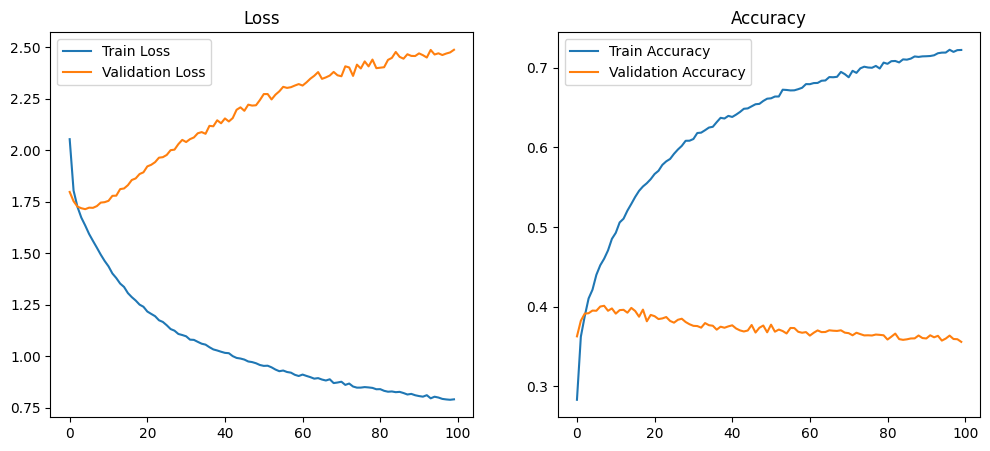

In [29]:
# Plot the training and validation accuracy and loss
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(transfer_history2.history['loss'], label='Train Loss')
plt.plot(transfer_history2.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Loss')

plt.subplot(1, 2, 2)
plt.plot(transfer_history2.history['accuracy'], label='Train Accuracy')
plt.plot(transfer_history2.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Accuracy')

plt.show()



- `There is a  huge overfit ,so let's try adjusting learning rate and use earlystopping.`

## `iii` Trial no. 3

### Model Training

In [30]:
transfer_model3 = Sequential()
transfer_model3.add(pre_trained)

transfer_model3.add(Dense(128, activation='relu'))
transfer_model3.add(BatchNormalization())
transfer_model3.add(Dropout(0.4))

transfer_model3.add(Dense(64, activation='relu'))
transfer_model3.add(Dropout(0.3))

transfer_model3.add(Dense(10, activation='softmax'))

transfer_model2.summary()

Model: "sequential_11"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ resnet50v2 (Functional)              │ (None, 2048)                │      23,564,800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_4 (Flatten)                  │ (None, 2048)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 256)                 │         524,544 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 256)                 │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 25,243,040 (96.29 MB)

 Trainable params: 559,242 (2.13 MB)

 Non-trainable params: 23,565,312 (89.89 MB)

 Optimizer params: 1,118,486 (4.27 MB)

In [33]:
optimizer = Adam(learning_rate=0.0001)
transfer_model3.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

In [35]:
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

In [36]:
transfer_history3 = transfer_model3.fit(X_train, y_train, epochs=EPOCHS, batch_size=BATCH_SIZE, validation_split=0.15)

Epoch 1/100
665/665 ━━━━━━━━━━━━━━━━━━━━ 28s 25ms/step - accuracy: 0.1249 - loss: 2.9196 - val_accuracy: 0.2449 - val_loss: 2.1310
Epoch 2/100
665/665 ━━━━━━━━━━━━━━━━━━━━ 7s 10ms/step - accuracy: 0.1898 - loss: 2.3640 - val_accuracy: 0.2876 - val_loss: 2.0185
Epoch 3/100
665/665 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - accuracy: 0.2331 - loss: 2.1871 - val_accuracy: 0.3133 - val_loss: 1.9504
Epoch 4/100
665/665 ━━━━━━━━━━━━━━━━━━━━ 11s 10ms/step - accuracy: 0.2562 - loss: 2.1089 - val_accuracy: 0.3297 - val_loss: 1.9043
Epoch 5/100
665/665 ━━━━━━━━━━━━━━━━━━━━ 7s 10ms/step - accuracy: 0.2801 - loss: 2.0304 - val_accuracy: 0.3377 - val_loss: 1.8728
Epoch 6/100
665/665 ━━━━━━━━━━━━━━━━━━━━ 10s 10ms/step - accuracy: 0.2873 - loss: 1.9903 - val_accuracy: 0.3460 - val_loss: 1.8466
Epoch 7/100
665/665 ━━━━━━━━━━━━━━━━━━━━ 10s 10ms/step - accuracy: 0.3047 - loss: 1.9443 - val_accuracy: 0.3501 - val_loss: 1.8240
Epoch 8/100
665/665 ━━━━━━━━━━━━━━━━━━━━ 7s 10ms/step - accuracy: 0.3213 - loss: 1.9187

### Model Evaluation

In [37]:
loss_train, accuracy_train = transfer_model3.evaluate(X_train, y_train)
print(f"Accuracy for training: {accuracy_train:.4%}")

loss_test, accuracy_test = transfer_model3.evaluate(X_test, y_test)
print(f"Accuracy for testing: {accuracy_test:.4%}")

1563/1563 ━━━━━━━━━━━━━━━━━━━━ 14s 8ms/step - accuracy: 0.6443 - loss: 1.0683
Accuracy for training: 61.0740%
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.4004 - loss: 1.8806
Accuracy for testing: 39.1000%


### Result visualization

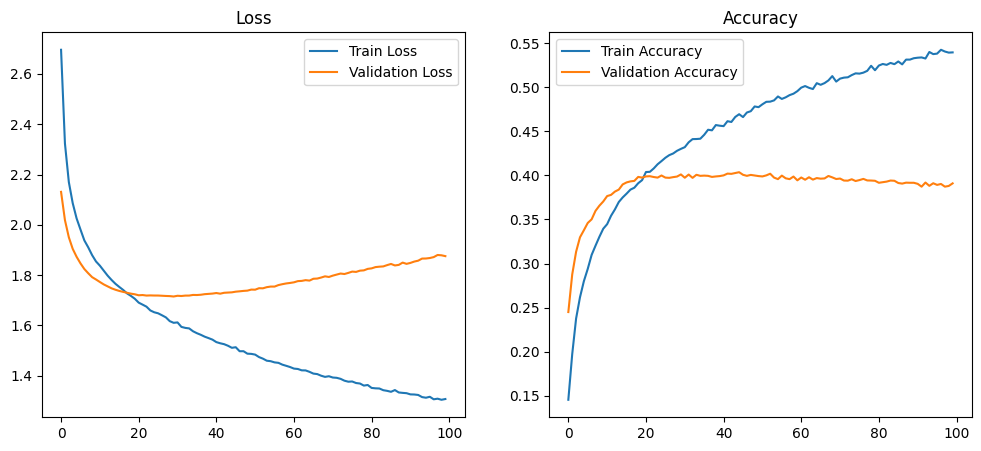

In [38]:
# Plot the training and validation accuracy and loss
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(transfer_history3.history['loss'], label='Train Loss')
plt.plot(transfer_history3.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Loss')

plt.subplot(1, 2, 2)
plt.plot(transfer_history3.history['accuracy'], label='Train Accuracy')
plt.plot(transfer_history3.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Accuracy')

plt.show()

---

# `03` Network from scratch
- Repeat  01 and 02 using MNIST dataset but do NOT use transfer learning this time (design the network from scratch)
- Note that you will need to convert the training labels into categorical using one hot encoding using `to_categorical()` function

## `+` Load MNIST Dataset

In [45]:
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

In [46]:
print(f"Shape of X_train: {X_train.shape}")
print(f"Shape of y_train: {y_train.shape}")
print(f"Shape of X_test: {X_test.shape}")
print(f"Shape of y_test: {y_test.shape}")

Shape of X_train: (60000, 28, 28)
Shape of y_train: (60000,)
Shape of X_test: (10000, 28, 28)
Shape of y_test: (10000,)


### Preview the Images

In [48]:
# add new column for map encoded target two labels ex. 6-> 6
class_names = ['0', '1', '2', '3', '4',
               '5', '6', '7', '8', '9']

# Create a new column with the class names
y_train_with_names = [class_names[label] for label in y_train]
y_test_with_names = [class_names[label] for label in y_test]

# Print some examples
for i in range(5):
  print(f"Label: {y_train[i]}, Class name: {y_train_with_names[i]}")

Label: 5, Class name: 5
Label: 0, Class name: 0
Label: 4, Class name: 4
Label: 1, Class name: 1
Label: 9, Class name: 9


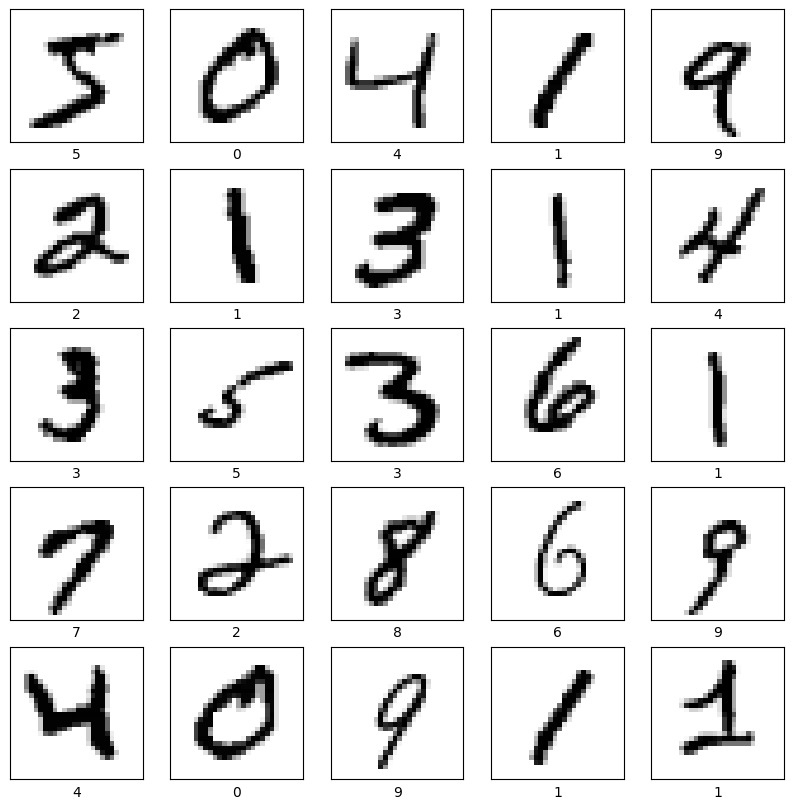

In [50]:
# plot first few images
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_train[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[y_train[i]])
plt.show()

### OneHotEncode Target Variable

In [51]:
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

### Rescale Independent Features

In [52]:
# Rescale the Input
X_train = X_train / 255.
X_test = X_test / 255.

## `+` Set Global Parameters

In [53]:
# Hyperparameters
BATCH_SIZE  = 50
NUM_CLASSES = 10
EPOCHS      = 100

## `i` ANN Trials

### Trial no. 1

#### Model Training

In [54]:
model1 = Sequential()
model1.add(Flatten(input_shape=(28, 28)))

model1.add(Dense(256, activation='relu'))
model1.add(BatchNormalization())
model1.add(Dropout(0.3))

model1.add(Dense(128, activation='relu'))
model1.add(Dropout(0.3))

model1.add(Dense(64, activation='relu'))
model1.add(Dropout(0.2))

model1.add(Dense(10, activation='softmax'))

model1.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_13"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_5 (Flatten)                  │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 256)                 │         200,960 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 256)                 │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_6 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 243,786 (952.29 KB)

 Trainable params: 243,274 (950.29 KB)

 Non-trainable params: 512 (2.00 KB)

In [55]:
model1.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [56]:
history1 = model1.fit(X_train, y_train, epochs=EPOCHS, batch_size=BATCH_SIZE, validation_split=0.15)

Epoch 1/100
1020/1020 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.7877 - loss: 0.6836 - val_accuracy: 0.9576 - val_loss: 0.1441
Epoch 2/100
1020/1020 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9306 - loss: 0.2341 - val_accuracy: 0.9688 - val_loss: 0.1042
Epoch 3/100
1020/1020 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9450 - loss: 0.1856 - val_accuracy: 0.9716 - val_loss: 0.0930
Epoch 4/100
1020/1020 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9528 - loss: 0.1588 - val_accuracy: 0.9740 - val_loss: 0.0844
Epoch 5/100
1020/1020 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9596 - loss: 0.1389 - val_accuracy: 0.9753 - val_loss: 0.0818
Epoch 6/100
1020/1020 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9591 - loss: 0.1334 - val_accuracy: 0.9768 - val_loss: 0.0847
Epoch 7/100
1020/1020 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9640 - loss: 0.1174 - val_accuracy: 0.9766 - val_loss: 0.0789
Epoch 8/100
1020/1020 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9679 - loss: 0

#### Model Ealuation

In [57]:
loss_train, accuracy_train = model1.evaluate(X_train, y_train)
print(f"Accuracy for training: {accuracy_train:.4%}")

loss_test, accuracy_test = model1.evaluate(X_test, y_test)
print(f"Accuracy for testing: {accuracy_test:.4%}")

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9995 - loss: 0.0020
Accuracy for training: 99.7417%
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9822 - loss: 0.0838
Accuracy for testing: 98.4400%


#### Result Visualization

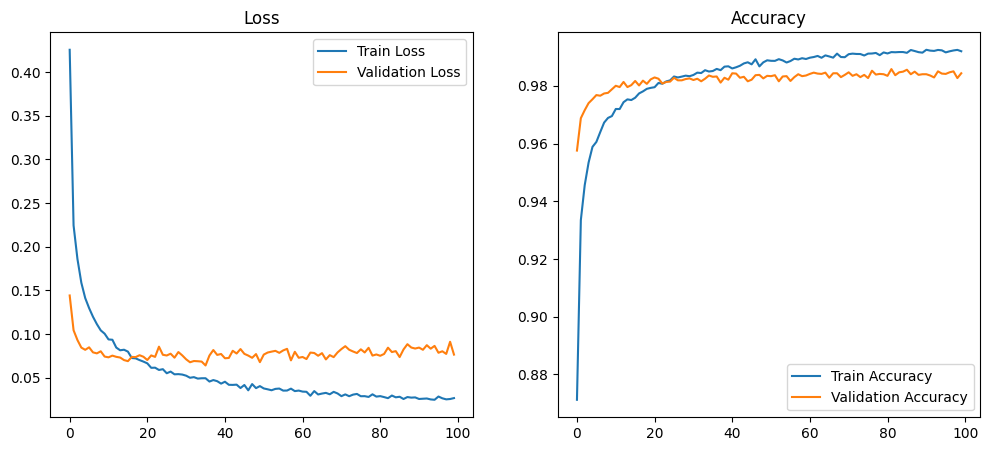

In [58]:
# Plot the training and validation accuracy and loss
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history1.history['loss'], label='Train Loss')
plt.plot(history1.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Loss')

plt.subplot(1, 2, 2)
plt.plot(history1.history['accuracy'], label='Train Accuracy')
plt.plot(history1.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Accuracy')

plt.show()


### Trial no. 2

#### Model Training

In [59]:
model2 = Sequential()
model2.add(Flatten(input_shape=(28, 28)))

model2.add(Dense(128, activation='relu'))
model2.add(BatchNormalization())
model2.add(Dropout(0.3))

model2.add(Dense(10, activation='softmax'))

model2.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_14"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_6 (Flatten)                  │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 128)                 │         100,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 128)                 │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_7 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_12 (Dense)                     │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 102,282 (399.54 KB)

 Trainable params: 102,026 (398.54 KB)

 Non-trainable params: 256 (1.00 KB)

In [60]:
model2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [61]:
history2 = model2.fit(X_train, y_train, epochs=EPOCHS, batch_size=BATCH_SIZE, validation_split=0.15)

Epoch 1/100
1020/1020 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8351 - loss: 0.5437 - val_accuracy: 0.9593 - val_loss: 0.1410
Epoch 2/100
1020/1020 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9433 - loss: 0.1903 - val_accuracy: 0.9662 - val_loss: 0.1161
Epoch 3/100
1020/1020 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9551 - loss: 0.1453 - val_accuracy: 0.9718 - val_loss: 0.0990
Epoch 4/100
1020/1020 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9618 - loss: 0.1265 - val_accuracy: 0.9748 - val_loss: 0.0913
Epoch 5/100
1020/1020 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9664 - loss: 0.1100 - val_accuracy: 0.9761 - val_loss: 0.0897
Epoch 6/100
1020/1020 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9676 - loss: 0.1012 - val_accuracy: 0.9752 - val_loss: 0.0867
Epoch 7/100
1020/1020 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9686 - loss: 0.0981 - val_accuracy: 0.9771 - val_loss: 0.0846
Epoch 8/100
1020/1020 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9726 - loss: 0

#### Model Evaluation

In [62]:
loss_train, accuracy_train = model2.evaluate(X_train, y_train)
print(f"Accuracy for training: {accuracy_train:.4%}")

loss_test, accuracy_test = model2.evaluate(X_test, y_test)
print(f"Accuracy for testing: {accuracy_test:.4%}")

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9997 - loss: 0.0022
Accuracy for training: 99.7250%
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9747 - loss: 0.1216
Accuracy for testing: 97.9300%


#### Result Visualization

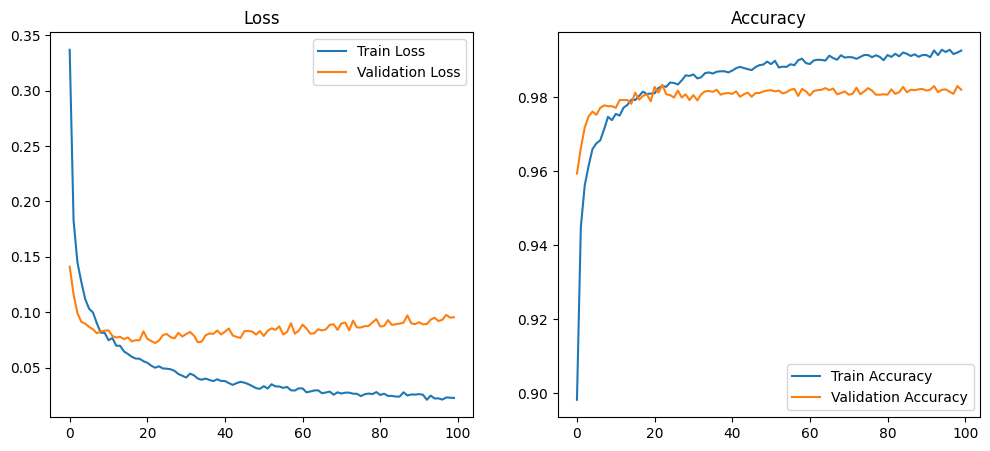

In [63]:
# Plot the training and validation accuracy and loss
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history2.history['loss'], label='Train Loss')
plt.plot(history2.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Loss')

plt.subplot(1, 2, 2)
plt.plot(history2.history['accuracy'], label='Train Accuracy')
plt.plot(history2.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Accuracy')

plt.show()


## `ii` CNN Trials

### Trial no. 1

#### Datasets Reshaping

In [64]:
X_train = X_train.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)
X_train.shape, X_test.shape

((60000, 28, 28, 1), (10000, 28, 28, 1))

#### Model Training

In [65]:
model_CNN1 = Sequential()
model_CNN1.add(Input(shape=X_train.shape[1:]))
model_CNN1.add(Conv2D(32, (3,3), padding='same', activation='relu'))
model_CNN1.add(MaxPooling2D(pool_size=(2,2)))
model_CNN1.add(Conv2D(64, (3,3), padding='same', activation='relu'))
model_CNN1.add(MaxPooling2D(pool_size=(2,2)))
model_CNN1.add(Flatten())
model_CNN1.add(Dense(64, activation='relu'))
model_CNN1.add(Dropout(0.3))
model_CNN1.add(Dense(32, activation='relu'))
model_CNN1.add(Dropout(0.2))
model_CNN1.add(Dense(10, activation='softmax'))

model_CNN1.summary()

Model: "sequential_15"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 28, 28, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 14, 14, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 14, 14, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 7, 7, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_7 (Flatten)                  │ (None, 3136)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ (None, 64)                  │         200,768 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_8 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_14 (Dense)                     │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_9 (Dropout)                  │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_15 (Dense)                     │ (None, 10)                  │             330 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 221,994 (867.16 KB)

 Trainable params: 221,994 (867.16 KB)

 Non-trainable params: 0 (0.00 B)

In [66]:
model_CNN1.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [67]:
history_CNN1 = model_CNN1.fit(X_train, y_train, epochs=EPOCHS, batch_size=BATCH_SIZE, validation_split=0.15)

Epoch 1/100
1020/1020 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.7607 - loss: 0.7218 - val_accuracy: 0.9829 - val_loss: 0.0597
Epoch 2/100
1020/1020 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9659 - loss: 0.1203 - val_accuracy: 0.9877 - val_loss: 0.0422
Epoch 3/100
1020/1020 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9761 - loss: 0.0866 - val_accuracy: 0.9883 - val_loss: 0.0441
Epoch 4/100
1020/1020 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9813 - loss: 0.0669 - val_accuracy: 0.9897 - val_loss: 0.0383
Epoch 5/100
1020/1020 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9835 - loss: 0.0586 - val_accuracy: 0.9907 - val_loss: 0.0394
Epoch 6/100
1020/1020 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9869 - loss: 0.0487 - val_accuracy: 0.9900 - val_loss: 0.0382
Epoch 7/100
1020/1020 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9873 - loss: 0.0440 - val_accuracy: 0.9902 - val_loss: 0.0450
Epoch 8/100
1020/1020 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9901 - loss: 0

#### Model Evaluation

In [68]:
loss_train, accuracy_train = model_CNN1.evaluate(X_train, y_train)
print(f"Accuracy for training: {accuracy_train:.4%}")

loss_test, accuracy_test = model_CNN1.evaluate(X_test, y_test)
print(f"Accuracy for testing: {accuracy_test:.4%}")

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9997 - loss: 0.0016
Accuracy for training: 99.8550%
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9915 - loss: 0.0624
Accuracy for testing: 99.2800%


#### Result Visualization

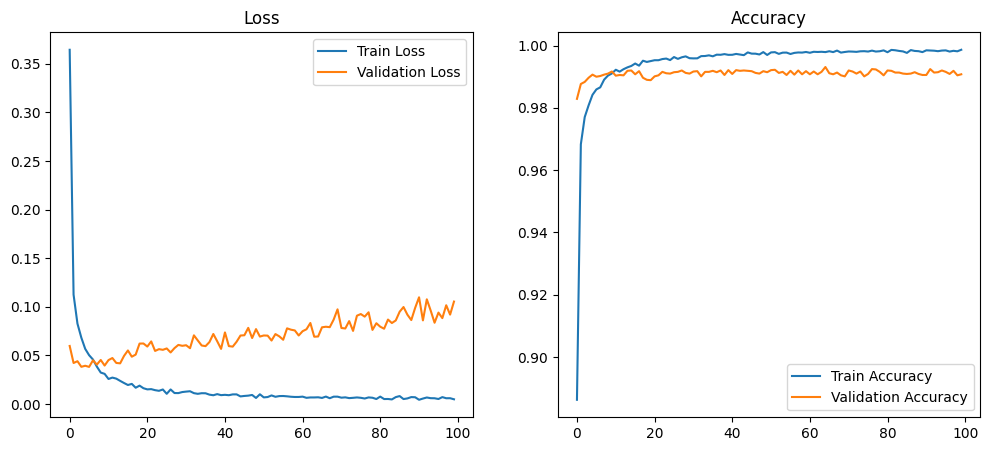

In [69]:
# Plot the training and validation accuracy and loss
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history_CNN1.history['loss'], label='Train Loss')
plt.plot(history_CNN1.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Loss')

plt.subplot(1, 2, 2)
plt.plot(history_CNN1.history['accuracy'], label='Train Accuracy')
plt.plot(history_CNN1.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Accuracy')

plt.show()


### Trial no. 2

#### Model Training

In [70]:
model_CNN2 = Sequential()

model_CNN2.add(Input(shape=(28, 28, 1)))

model_CNN2.add(Conv2D(32, (3, 3), padding='same', activation='relu'))
model_CNN2.add(BatchNormalization())
model_CNN2.add(MaxPooling2D(pool_size=(2, 2)))

model_CNN2.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
model_CNN2.add(BatchNormalization())
model_CNN2.add(MaxPooling2D(pool_size=(2, 2)))
model_CNN2.add(Dropout(0.25))

model_CNN2.add(Conv2D(128, (3, 3), padding='same', activation='relu'))
model_CNN2.add(BatchNormalization())
model_CNN2.add(MaxPooling2D(pool_size=(2, 2)))
model_CNN2.add(Dropout(0.3))

model_CNN2.add(Flatten())
model_CNN2.add(Dense(128, activation='relu'))
model_CNN2.add(BatchNormalization())
model_CNN2.add(Dropout(0.4))

model_CNN2.add(Dense(64, activation='relu'))
model_CNN2.add(Dropout(0.3))

model_CNN2.add(Dense(10, activation='softmax'))

model_CNN2.summary()

Model: "sequential_16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)                    │ (None, 28, 28, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_4                │ (None, 28, 28, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 14, 14, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 14, 14, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_5                │ (None, 14, 14, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 7, 7, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_10 (Dropout)                 │ (None, 7, 7, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 7, 7, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_6                │ (None, 7, 7, 128)           │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_7 (MaxPooling2D)       │ (None, 3, 3, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_11 (Dropout)                 │ (None, 3, 3, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_8 (Flatten)                  │ (None, 1152)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_16 (Dense)                     │ (None, 128)                 │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_7                │ (None, 128)                 │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_12 (Dropout)                 │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_17 (Dense)                     │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_13 (Dropout)                 │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_18 (Dense)                     │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 250,570 (978.79 KB)

 Trainable params: 249,866 (976.04 KB)

 Non-trainable params: 704 (2.75 KB)

In [71]:
model_CNN2.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [72]:
history_CNN2 = model_CNN2.fit(X_train, y_train, epochs=EPOCHS, batch_size=BATCH_SIZE, validation_split=0.15)

Epoch 1/100
1020/1020 ━━━━━━━━━━━━━━━━━━━━ 13s 5ms/step - accuracy: 0.7903 - loss: 0.6625 - val_accuracy: 0.9872 - val_loss: 0.0464
Epoch 2/100
1020/1020 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9684 - loss: 0.1098 - val_accuracy: 0.9853 - val_loss: 0.0508
Epoch 3/100
1020/1020 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9769 - loss: 0.0796 - val_accuracy: 0.9911 - val_loss: 0.0318
Epoch 4/100
1020/1020 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.9812 - loss: 0.0636 - val_accuracy: 0.9924 - val_loss: 0.0283
Epoch 5/100
1020/1020 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9841 - loss: 0.0532 - val_accuracy: 0.9910 - val_loss: 0.0322
Epoch 6/100
1020/1020 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9856 - loss: 0.0471 - val_accuracy: 0.9910 - val_loss: 0.0285
Epoch 7/100
1020/1020 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.9855 - loss: 0.0511 - val_accuracy: 0.9919 - val_loss: 0.0295
Epoch 8/100
1020/1020 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9866 - loss: 

#### Model Evaluation

In [73]:
loss_train, accuracy_train = model_CNN2.evaluate(X_train, y_train)
print(f"Accuracy for training: {accuracy_train:.4%}")

loss_test, accuracy_test = model_CNN2.evaluate(X_test, y_test)
print(f"Accuracy for testing: {accuracy_test:.4%}")

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9999 - loss: 4.5920e-04
Accuracy for training: 99.9200%
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9940 - loss: 0.0310
Accuracy for testing: 99.4900%


#### Result Visualization

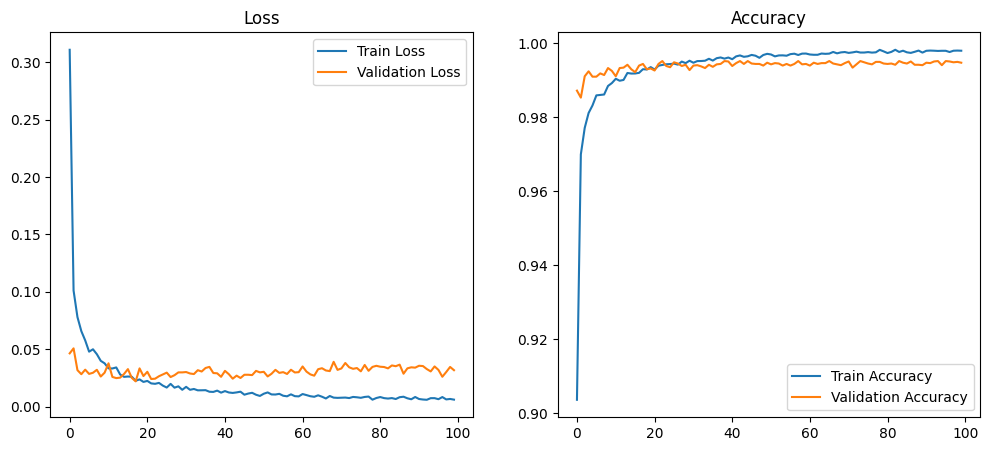

In [74]:
# Plot the training and validation accuracy and loss
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history_CNN2.history['loss'], label='Train Loss')
plt.plot(history_CNN2.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Loss')

plt.subplot(1, 2, 2)
plt.plot(history_CNN2.history['accuracy'], label='Train Accuracy')
plt.plot(history_CNN2.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Accuracy')

plt.show()


----------------------------------------------

$$ Thank \space you \space ♡ $$
